In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
import pickle 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
vectorizer=TfidfVectorizer()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
df=pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=['label', 'message'])
df.columns=['label', 'message']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.sample(5)

,label,message,label_num
4070,ham,Hope youre not having too much fun without me...,0
4651,ham,Finally it has happened..! Aftr decades..! BEE...,0
1286,ham,"Just wondering, the others just took off",0
1830,spam,Hottest pics straight to your phone!! See me g...,1
3301,ham,Just do what ever is easier for you,0


In [4]:
df['label_num'].value_counts()

label_num
0    4825
1     747
Name: count, dtype: int64

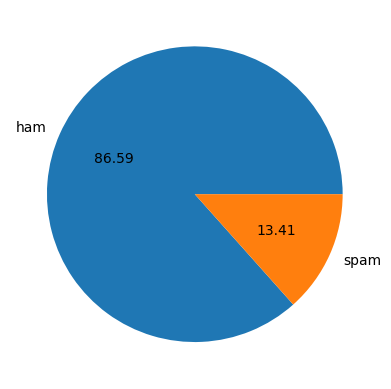

In [5]:
plt.pie(df['label_num'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [6]:
df['length']=df['message'].apply(len)
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [7]:
df.head()

,label,message,label_num,length,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [8]:
df[['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,5572.000000,5572.000000,5572.000000
mean,80.489950,18.842426,2.006102
std,59.942907,13.851947,1.539977
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,122.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [9]:
df[df['label_num']==0][['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.482487,17.425699,1.846010
std,58.440652,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [10]:
df[df['label_num']==1][['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,138.670683,27.993307,3.040161
std,28.873603,6.860440,1.548499
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


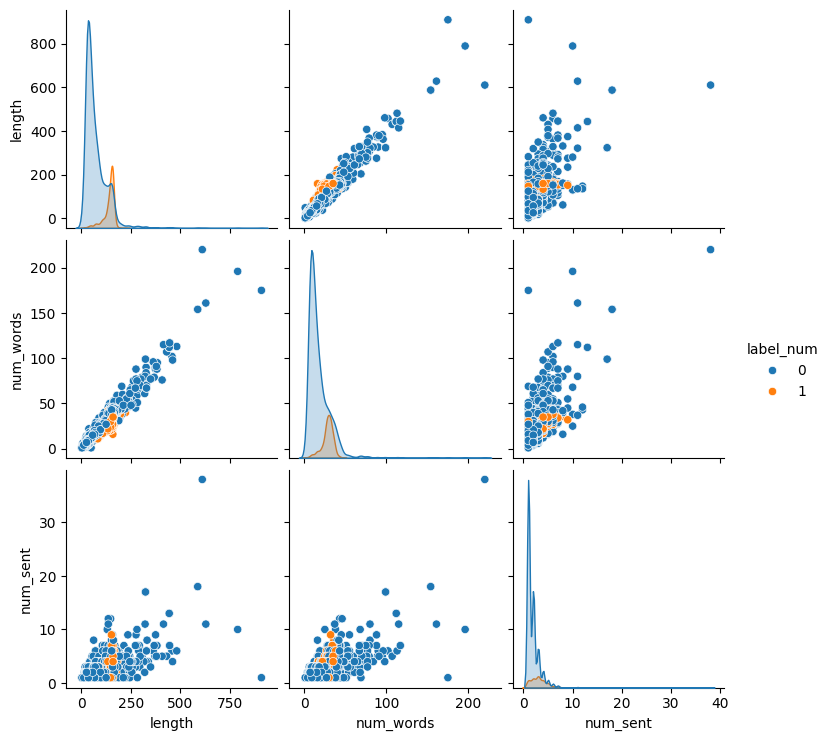

In [11]:
sns.pairplot(df,hue='label_num')

In [12]:
df.select_dtypes(include=['number']).corr()

,label_num,length,num_words,num_sent
label_num,1.000000,0.381937,0.259958,0.264230
length,0.381937,1.000000,0.966435,0.630641
num_words,0.259958,0.966435,1.000000,0.685898
num_sent,0.264230,0.630641,0.685898,1.000000


In [13]:
def transform_sms(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
df['transformed']=df['message'].apply(transform_sms)

In [ ]:
df.head()

In [ ]:
spam_wc=wc.generate(df[df['label_num']==1]['transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['label_num']==0]['transformed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
X=df['message']
y=df['label_num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
vectorizer=TfidfVectorizer()
X_train_vectorized=vectorizer.fit_transform(X_train)

In [ ]:
model=BernoulliNB()
model.fit(X_train_vectorized, y_train)
X_test_vectorized=vectorizer.transform(X_test)
y_pred=model.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
model=MultinomialNB()
model.fit(X_train_vectorized, y_train)
X_test_vectorized=vectorizer.transform(X_test)
y_pred=model.predict(X_test_vectorized)
print(confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
def predict_spam_ham(text_message):
    with open('vectorizer.pkl', 'rb') as vec_file:
        loaded_vectorizer = pickle.load(vec_file)
    with open('model.pkl', 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    input_vector = loaded_vectorizer.transform([text_message])  
    prediction = loaded_model.predict(input_vector)[0] 
    return "SPAM" if prediction == 1 else "HAM"

In [ ]:
while True:
    user_input=input("Enter an SMS message (or type 'exit' to quit):\n")
    if user_input.lower() == 'exit':
        break
    prediction = predict_spam_ham(user_input)
    print("Prediction:", prediction)